# 01 - sample $\pi$

In this example, we will approximate $\pi$ by direct Monte Carlo (MC) sampling.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

We define a function `sample_pi(n)` which computes

$\pi_{\text{sampled}} = \frac{4}{n} \sum\limits_{i=0}^{n-1} \chi(x_i, y_i)$

where

$\chi(x, y) = \left\{ \begin{array}{rl}
1, & x^2 + y^2 \leq 1 \\
0, & else
\end{array} \right.$

and $(x,y)$ are uniformaly distributed random numbers inside the unit square $[0,1]^2$.

In [2]:
def sample_pi(n):
    r"""
    Perform a direct MC sampling to estimate :math:`\pi`.
    
    Parameters
    ----------
    n : int
        Number of samples.
    
    Returns
    -------
    float
        Estimate of :math:`\pi`.
    
    """
    r = np.linalg.norm(np.random.rand(n, 2), axis=1)
    return 4.0 * np.sum((r <= 1.0)) / float(n)

# run the code five times and print the results
for i in range(5):
    print("Run %d: %.5f" % (i + 1, sample_pi(10000)))

Run 1: 3.12800
Run 2: 3.13320
Run 3: 3.13360
Run 4: 3.14360
Run 5: 3.14960


We further define a function `sample_dist(n, m=100)` which performs $m$ independent MC runs and returns the $\pi$-estimates.

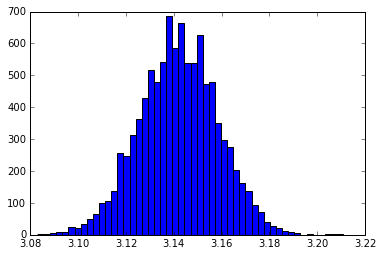

In [3]:
def sample_dist(n, m=100):
    r"""
    Perform a series of direct MC runs to sample multiple :math:`\pi` estimates.
    
    Parameters
    ----------
    n : int
        Number of samples in each MC run.
    m : int, default=100
        Number of MC runs.
    
    Returns
    -------
    numpy.ndarray(shape=(m,), dtype=numpy.float64)
        Estimates of :math:`\pi`
    
    """
    return np.asarray([sample_pi(n) for i in range(m)], dtype=np.float64)

# generate a distribution of 10000 pi estimates and plot the distribution
plt.hist(sample_dist(10000, m=10000), bins=50);

Now, we start to experiment with these functions. We call `sample_dist(n)` for different choices of $n$ and compute mean values and standard deviations for each choice of n.

In [4]:
nvals = [10, 100, 1000, 10000, 100000, 1000000]
data = np.array([sample_dist(n) for n in nvals])

data_mean = np.mean(data, axis=1)
data_std = np.std(data, axis=1, ddof=1)

Finally, we visualize our results.

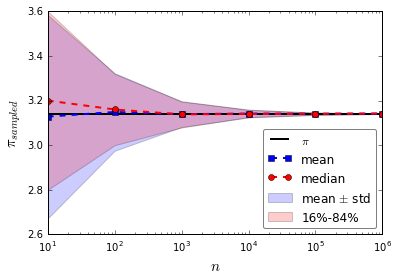

In [5]:
fig, ax = plt.subplots()
ax.plot(
    nvals, [np.pi] * len(nvals),
    '-', label=r"$\pi$", linewidth=2, color="black")
ax.fill_between(
    nvals, data_mean - data_std, data_mean + data_std,
    alpha=0.2, facecolor="blue", label=r"mean $\pm$ std")
ax.fill_between(
    nvals, np.percentile(data, 16, axis=1), np.percentile(data, 84, axis=1),
    alpha=0.2, facecolor="red", label=r"16%-84%")
ax.plot(
    nvals, data_mean,
    '--s', label="mean", linewidth=2, color="blue")
ax.plot(
    nvals, np.median(data, axis=1),
    '--o', label="median", linewidth=2, color="red")
ax.semilogx()
ax.set_xlabel(r"$n$", fontsize=15)
ax.set_ylabel(r"$\pi_{sampled}$", fontsize=15)
ax.legend(loc=4, fancybox=True, framealpha=0.5)